In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219  44659096
1  2004-08-20  50.555557  54.594597  50.300301  54.209209  54.209209  22834343
2  2004-08-23  55.430431  56.796799  54.579578  54.754753  54.754753  18256126
3  2004-08-24  55.675674  55.855858  51.836838  52.487488  52.487488  15247337
4  2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   9188602


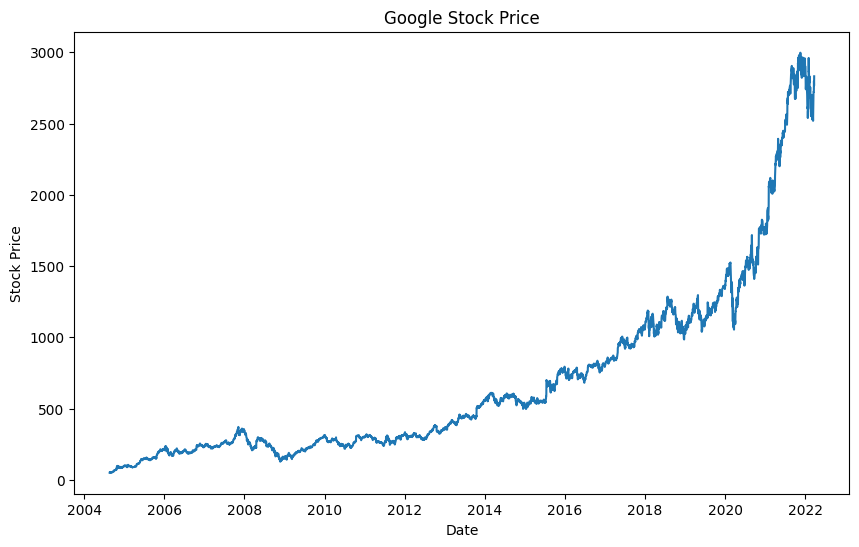

In [14]:
# Load the dataset
df = pd.read_csv('GOOGL.csv')

# Display the first few rows to understand the data structure
print(df.head())

# Let's assume the dataset has 'Date' and 'Close' columns, where 'Close' is the stock price
df = df[['Date', 'Close']]

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plot the closing price of the stock
plt.figure(figsize=(10,6))
plt.plot(df['Close'])
plt.title('Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()


In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [16]:
# Create a function to prepare the data for training (time series data)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [17]:
# Define the time step (number of previous days to predict the next day)
time_step = 10

# Prepare the training data
X, y = create_dataset(scaled_data, time_step)

In [18]:

# Reshape X to be compatible with LSTM input (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [19]:
# Build the LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])


In [ ]:
# # Adding LSTM layers with increased units and a dropout layer
# model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# model.add(Dropout(0.2))  # Dropout to prevent overfitting
# model.add(LSTM(units=50, return_sequences=False))
# model.add(Dropout(0.2))  # Dropout to prevent overfitting
# model.add(Dense(units=1))  # Output layer

In [20]:
# Compile the model with a custom learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [21]:
# Train the model with more epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100

221/221 [==============================] - 9s 13ms/step - loss: 7.1134e-04 - val_loss: 3.8469e-04
Epoch 2/100
221/221 [==============================] - 2s 8ms/step - loss: 2.2004e-04 - val_loss: 0.0018
Epoch 3/100
221/221 [==============================] - 2s 10ms/step - loss: 2.0498e-04 - val_loss: 9.7525e-04
Epoch 4/100
221/221 [==============================] - 2s 9ms/step - loss: 1.6911e-04 - val_loss: 0.0033
Epoch 5/100
221/221 [==============================] - 2s 8ms/step - loss: 1.4553e-04 - val_loss: 4.6920e-04
Epoch 6/100
221/221 [==============================] - 2s 7ms/step - loss: 1.2601e-04 - val_loss: 5.6204e-04
Epoch 7/100
221/221 [==============================] - 2s 8ms/step - loss: 1.2658e-04 - val_loss: 4.3944e-04
Epoch 8/100
221/221 [==============================] - 2s 8ms/step - loss: 1.1853e-04 - val_loss: 4.4123e-04
Epoch 9/100
221/221 [==============================] - 2s 8ms/step - loss: 1.2822e-04 - val_loss: 0.0016
Epoch 10/100
221/221 [======

In [22]:
# Make predictions using the trained model
predicted_stock_price = model.predict(X_test)

28/28 [==============================] - 1s 4ms/step


In [23]:
# Inverse transform to get the actual stock price values
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

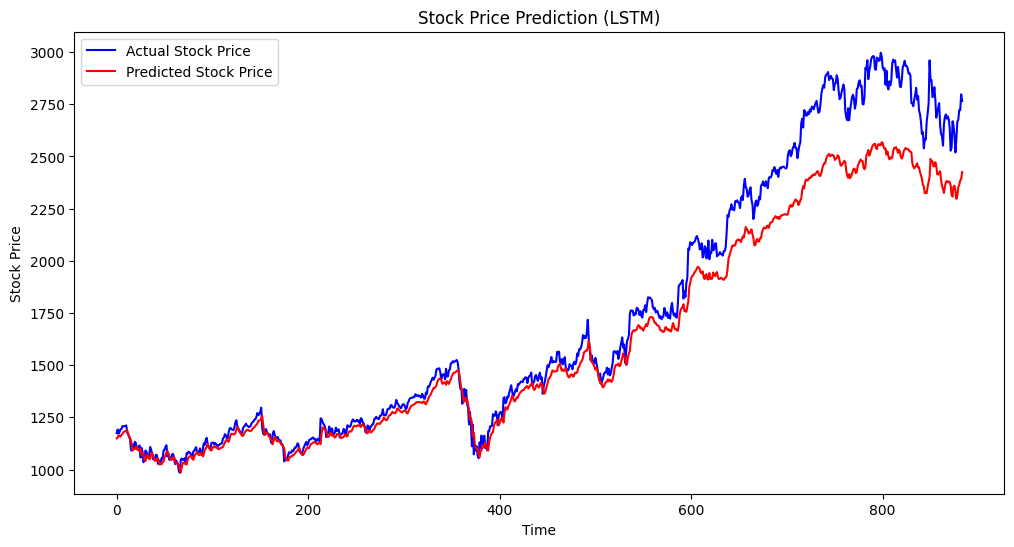

In [24]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()